# **\[Video Games System Recommendation] - Ananta Boemi Adji**

### **Latar Belakang**

Industri video game merupakan salah satu sektor hiburan terbesar dan terus berkembang pesat dari tahun ke tahun. Jumlah game yang tersedia di pasaran sangat banyak, baik dari berbagai genre, platform, maupun rating yang berbeda-beda. Kondisi ini membuat para pemain (gamer) sering kali kebingungan untuk menentukan game mana yang layak untuk dimainkan, terutama yang sesuai dengan preferensi mereka.

Permasalahan utama yang ingin diselesaikan adalah **bagaimana membantu pengguna menemukan video game yang sesuai dengan preferensi mereka secara efisien dan personal**. Oleh karena itu, pada proyek ini akan dikembangkan sebuah **sistem rekomendasi video game** berdasarkan data penjualan, rating pengguna, rating kritikus, serta metadata lainnya seperti genre dan platform.

Sistem rekomendasi akan dibangun menggunakan dua pendekatan utama, yaitu **Content-Based Filtering** dan **Collaborative Filtering**. Hasil akhir dari sistem ini akan menyajikan rekomendasi Top-N game kepada pengguna berdasarkan kesamaan konten dan pola perilaku pengguna lain.

---

## **Tujuan Proyek**

Tujuan utama dari proyek ini adalah:

* Mengembangkan sistem rekomendasi game yang dapat memberikan rekomendasi personal kepada pengguna.
* Mengeksplorasi dua pendekatan rekomendasi: Content-Based Filtering dan Collaborative Filtering.
* Melatih dan mengevaluasi model untuk menghasilkan rekomendasi Top-N game.
* Memberikan insight dari fitur-fitur yang paling mempengaruhi minat pengguna terhadap game tertentu.
* Menyediakan laporan analisis dan sistem yang mudah dipahami dan dapat digunakan oleh pengguna akhir.

---

## **Informasi Dataset**

Dataset yang digunakan dalam proyek ini adalah **Video Game Sales with Ratings**, yang tersedia secara publik di platform Kaggle.

* **Nama Dataset:** Video Game Sales with Ratings
* **Sumber:** Kaggle
* **Publisher:** rush4ratio
* **Link Dataset:** [https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

Dataset ini menggabungkan data penjualan video game dari VGChartz dan data rating dari Metacritic, mencakup berbagai platform dan genre.

---

## **Alur Pengerjaan Project**

Langkah-langkah pengerjaan proyek ini meliputi:

1. **Exploratory Data Analysis (EDA):**

   * Mengeksplorasi distribusi penjualan, rating, genre, dan platform.
   * Visualisasi korelasi antar fitur dan deteksi outlier/missing values.
   * Menentukan fitur penting yang dapat digunakan untuk rekomendasi.

2. **Preprocessing:**

   * Penanganan nilai hilang dan duplikat.
   * Encoding fitur kategorikal dan normalisasi numerik.
   * Pembuatan matriks kemiripan untuk content-based filtering dan user-item matrix untuk collaborative filtering.

3. **Modeling:**

   * Membangun sistem rekomendasi dengan **Content-Based Filtering** (berdasarkan kemiripan genre, platform, rating).
   * Membangun sistem rekomendasi dengan **Collaborative Filtering** menggunakan pendekatan matrix factorization (misalnya SVD).
   * Menyajikan hasil **Top-N Recommendation** untuk setiap pendekatan.

4. **Interpretasi dan Insight:**

   * Menganalisis hasil rekomendasi dan kecocokan dengan data historis.
   * Membandingkan kelebihan dan kekurangan dari kedua pendekatan.

---

## **Business Understanding**
Sistem rekomendasi memainkan peran kunci dalam platform distribusi konten digital, termasuk industri game. Rekomendasi yang akurat mampu meningkatkan kepuasan pengguna, meningkatkan waktu keterlibatan, dan mendorong transaksi pembelian.

* **Pengguna**: Mendapatkan rekomendasi game yang sesuai minat mereka.
* **Platform distribusi game**: Meningkatkan retensi pengguna dan pendapatan.
* **Developer & publisher game**: Mendapatkan eksposur lebih besar terhadap game mereka.

### Problem Statements:
* Bagaimana memberikan rekomendasi game yang relevan berdasarkan metadata konten game?
* Bagaimana memberikan rekomendasi game berdasarkan pola interaksi pengguna dengan game?
* Sejauh mana performa masing-masing pendekatan (CBF dan CF) dalam menghasilkan rekomendasi yang relevan?

### Goals:
* Membangun dua sistem rekomendasi: Content-Based Filtering dan Collaborative Filtering.
* Mengevaluasi performa model dengan metrik Precision\@k dan Recall\@k.
* Menyediakan sistem rekomendasi interaktif berdasarkan input pengguna.

---

## **Penilaian yang Diharapkan**

Proyek ini diharapkan dapat menghasilkan beberapa poin penting:

* Menyediakan sistem rekomendasi yang dapat memberikan **Top-N game terbaik** untuk pengguna berdasarkan preferensi historis dan konten game.
* Mampu mengevaluasi performa model dengan metrik seperti **Precision\@K**, **Recall\@K**, atau **RMSE** (untuk collaborative filtering).
* Menunjukkan pemahaman mendalam terhadap proses data preparation dan pemilihan fitur.
* Memberikan laporan analitis dan sistematis yang menjelaskan alur pembuatan sistem rekomendasi.
* Menyediakan dua pendekatan model dan evaluasi komparatif terhadap hasilnya.

# **1. Import Library**

Pada bagian ini saya akan berfokus import semua library yang akan dibutuhkan pada project ini.

| Kategori Library            | Library / Fungsi                              | Kegunaan                                                                  |
| ------------------- | --------------------------------------------- | ------------------------------------------------------------------------- |
| Data Manipulation   | `pandas`, `numpy`                             | Membaca, membersihkan, dan memproses data tabular                         |
| Visualisasi         | `matplotlib.pyplot`, `seaborn`                | Visualisasi distribusi data, korelasi, dan insight EDA                    |
| Preprocessing       | `MinMaxScaler`, `cosine_similarity`           | Normalisasi data numerik dan perhitungan kemiripan untuk content-based    |
| NLP (Content-Based) | `TfidfVectorizer`                             | Mengubah data teks menjadi vektor numerik (misalnya genre game)           |
| Collaborative       | `surprise`, `SVD`, `Reader`, `cross_validate` | Algoritma rekomendasi berbasis user-rating dengan collaborative filtering |
| Evaluation          | `mean_squared_error`, `sqrt`                  | Menghitung metrik RMSE untuk evaluasi rekomendasi collaborative           |
| Warnings Handling   | `warnings`                                    | Menyembunyikan warning yang tidak penting                                 |

---

Pada project ini juga saya akan menggunakan lightfm karena compatible dengan google colab.

In [183]:
!pip install lightfm --quiet

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import ipywidgets as widgets

from IPython.display import display, clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from lightfm import LightFM
from lightfm.data import Dataset as LFDataset
from lightfm.evaluation import precision_at_k, recall_at_k

import warnings
warnings.filterwarnings('ignore')

# **2. Load Dataset**

Dataset dimuat dari Google Drive menggunakan link share ID, dataset saya download langsung dari kaggle.

In [185]:
url = 'https://drive.google.com/uc?id=1jAOTErV-OG6mwBPzAywgpHdlsiWRcUjl'
df = pd.read_csv(url)

# **3. Exploratory Data Analysis (EDA)**

### **Melihat ringkasan dataset**

Pertama saya akan melihat ringkasan dari dataset seperti:
- statistik untuk kolom numerik: rata-rata, standar deviasi, min, max, dll.
- Serta melihat struktur umum dataset: jumlah baris & kolom, tipe data tiap kolom, dan nilai non-null

In [186]:
df.head()

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


**Insight**:

1. **Jumlah Data & Missing Value**

   * Dataset memiliki **16.719 entri**.
   * Ada beberapa kolom dengan **missing value cukup besar**, terutama:

     * `Critic_Score` (\~51% missing)
     * `Critic_Count` (\~51% missing)
     * `User_Score` (\~40% missing, dan bertipe object)
     * `User_Count` (\~54% missing)
     * `Developer` (\~40% missing)
     * `Rating` (\~41% missing)
       → data terkait ulasan **tidak selalu tersedia** untuk semua game.

3. **Distribusi Penjualan**

   * Sebagian besar game memiliki **penjualan yang sangat kecil**
   * Artinya, hanya sedikit game yang menjadi **top seller**

4. **Global Sales**

   * Median **Global\_Sales** adalah **0.17 juta unit**

5. **Review Metrics**

   * Rata-rata **Critic\_Score** adalah **68.97** → sebagian besar game **di-review cukup baik**.
   * Namun, data `User_Score` harus diolah karena masih berupa object.

6. **Lainnya**
  * Dataset ini memiliki **distribusi penjualan yang sangat tidak merata** → mayoritas game tidak terlalu laku, hanya sedikit yang blockbuster.
  * Banyak **missing value** di data review → perlu dilakukan pengaturan pada saat preprocessing.
  * Penjualan game dan review score berpotensi punya **hubungan menarik untuk dianalisis** (misal: apakah review score berkorelasi dengan sales?).

---

  **Struktur Dataset**

Struktur dan informasi yang ada pada dataset:

| Nama Kolom        | Deskripsi                                          | Tipe Data | Rentang / Contoh             |
| ----------------- | -------------------------------------------------- | --------- | ---------------------------- |
| `Name`            | Nama video game                                    | String    | "Super Mario Bros."          |
| `Platform`        | Platform rilis game (PS2, X360, PC, dll.)          | String    | "PS4", "X360", "PC"          |
| `Year_of_Release` | Tahun rilis game                                   | Integer   | 1980 - 2020 (banyak missing) |
| `Genre`           | Genre game                                         | String    | "Action", "Shooter"          |
| `Publisher`       | Perusahaan penerbit game                           | String    | "Nintendo", "EA Sports"      |
| `NA_Sales`        | Penjualan di Amerika Utara (dalam juta unit)       | Float     | 0.00 - 41.49                 |
| `EU_Sales`        | Penjualan di Eropa (dalam juta unit)               | Float     | 0.00 - 29.02                 |
| `JP_Sales`        | Penjualan di Jepang (dalam juta unit)              | Float     | 0.00 - 10.22                 |
| `Other_Sales`     | Penjualan di wilayah lain                          | Float     | 0.00 - 10.57                 |
| `Global_Sales`    | Total penjualan global                             | Float     | 0.01 - 82.74                 |
| `Critic_Score`    | Skor dari kritikus (0 - 100)                       | Float     | 13.0 - 98.0                  |
| `Critic_Count`    | Jumlah kritikus yang menilai game                  | Integer   | 3 - 51                       |
| `User_Score`      | Skor dari pengguna Metacritic (dalam skala 0 - 10) | Float     | 0.0 - 9.8                    |
| `User_Count`      | Jumlah pengguna yang memberikan skor               | Integer   | 1 - 10665                    |
| `Developer`       | Pengembang game                                    | String    | "Ubisoft", "EA Canada"       |
| `Rating`          | Rating ESRB game (misalnya E, T, M)                | String    | "E", "T", "M"                |

### **Mengecek missing values dan duplikasi dari dataset**

In [187]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

**Insight**:

Sudah aman tidak ada indikasi adanya data missing dan duplikat

### **Visualisasi Distribusi Data Numerik**

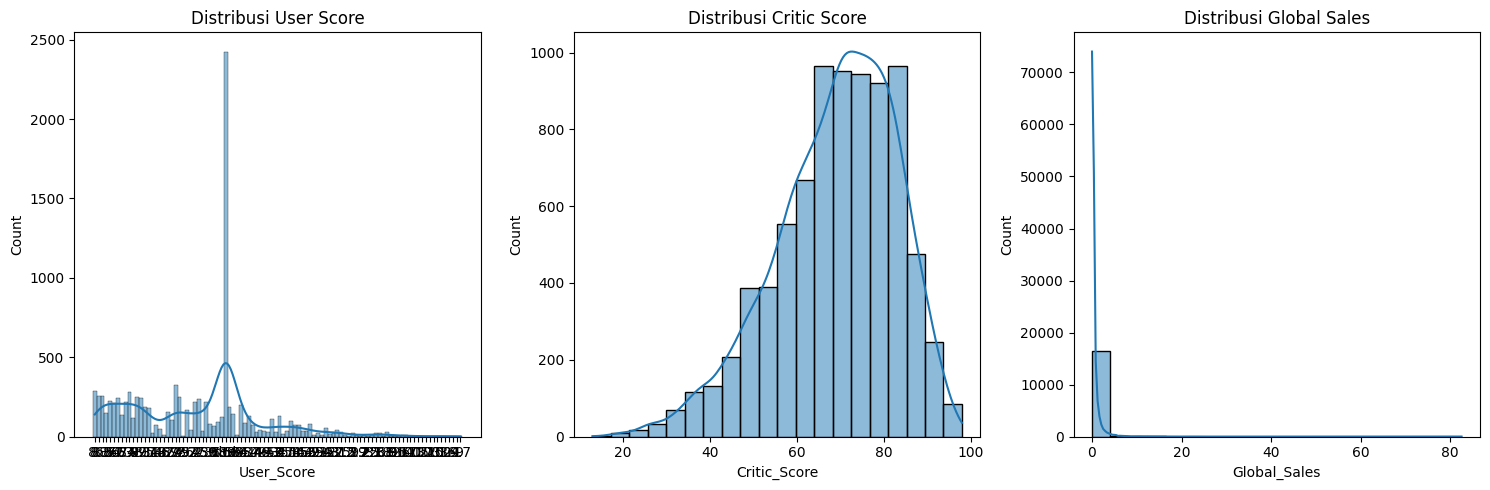

In [188]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['User_Score'].dropna(), kde=True, bins=20)
plt.title('Distribusi User Score')

plt.subplot(1, 3, 2)
sns.histplot(df['Critic_Score'].dropna(), kde=True, bins=20)
plt.title('Distribusi Critic Score')

plt.subplot(1, 3, 3)
sns.histplot(df['Global_Sales'].dropna(), kde=True, bins=20)
plt.title('Distribusi Global Sales')

plt.tight_layout()
plt.show()

**Insight**:

Berikut **deskripsi singkat** untuk setiap bagian:

---

Distribusi **User Score**

* **Banyak noise/data kotor** → terlihat ada nilai `tbd` atau label non-numerik.
* Distribusi belum dapat dianalisis dengan baik sebelum dilakukan pembersihan.
* Indikasi bahwa data User Score masih perlu preprocessing.

---

2️Distribusi **Critic Score**

* Distribusi mendekati **normal** dengan sedikit skew ke kiri.
* Mayoritas game mendapatkan skor **60–85**.
* Jarang ada game dengan skor sangat rendah (<40) atau sangat tinggi (>90).
* Menunjukkan bahwa **kritikus cenderung memberikan penilaian di rentang menengah ke atas**.

---

Distribusi **Global Sales**

* Distribusi sangat **right-skewed** (long-tail effect).
* Mayoritas game memiliki penjualan **di bawah 1 juta unit**.
* Hanya sedikit game yang mencapai penjualan **fenomenal** (>10 juta unit).

### **Check Outlier dengan Boxplot**

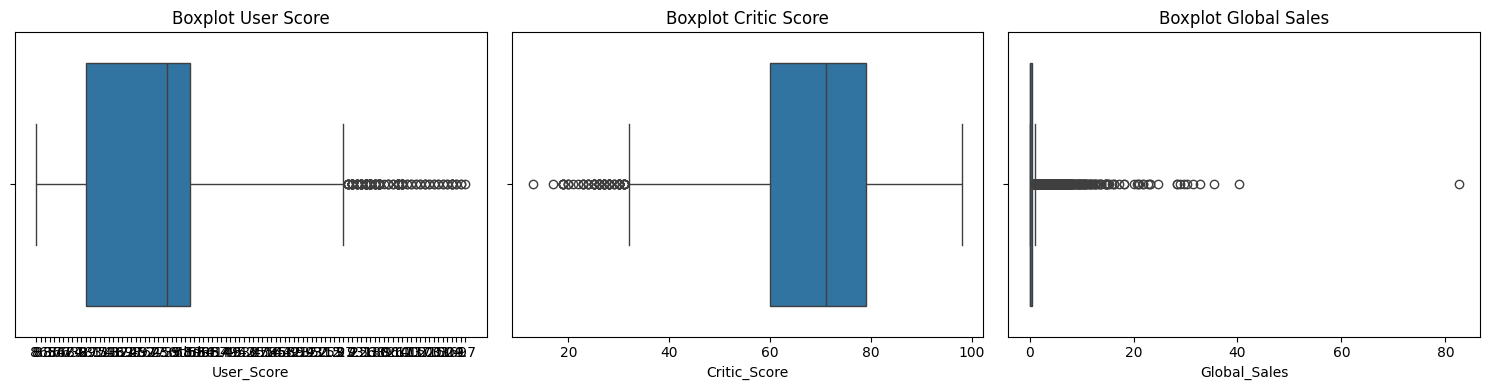

In [189]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['User_Score'])
plt.title('Boxplot User Score')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Critic_Score'])
plt.title('Boxplot Critic Score')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Global_Sales'])
plt.title('Boxplot Global Sales')

plt.tight_layout()
plt.show()

**Insight**:

- Data User Score menunjukkan banyak outlier dan kemungkinan data kotor (perlu preprocessing lebih lanjut). Critic Score terdistribusi normal dengan sebagian besar skor berada di rentang 60–80, namun tetap terdapat beberapa outlier di skor rendah.
- Global Sales, distribusi sangat right-skewed dengan banyak game berpenjualan rendah dan hanya sedikit game yang mencapai penjualan sangat tinggi (outlier), menunjukkan pola umum di industri hiburan di mana segelintir game blockbuster mendominasi pasar.

### **Korelasi antara fitur numerik**

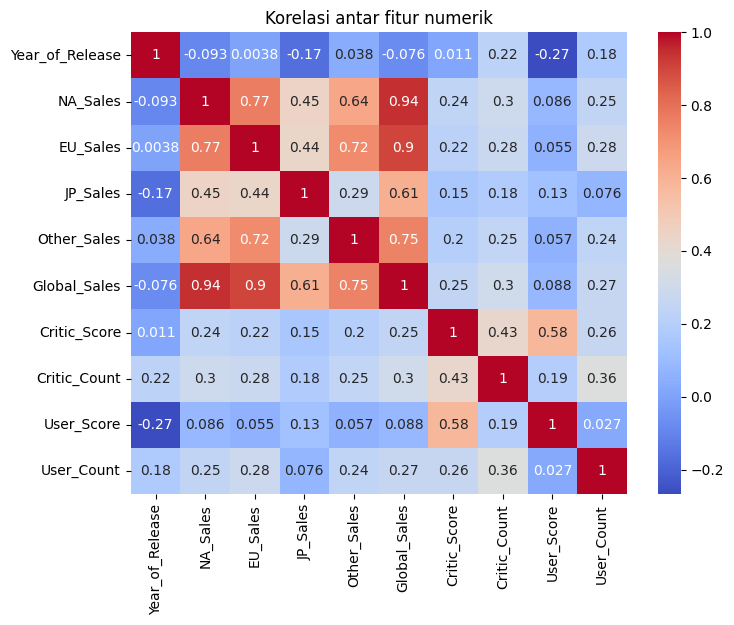

In [190]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur numerik')
plt.show()

**Insight**:

Terlihat bahwa Global Sales sangat berkorelasi kuat dengan semua regional sales, terutama dengan NA_Sales (0.94), diikuti oleh EU_Sales (0.90) dan Other_Sales (0.75), yang memang wajar karena Global Sales merupakan akumulasi dari penjualan regional. Korelasi antara Critic Score dan User Score bersifat positif (0.58), mengindikasikan adanya hubungan cukup baik antara penilaian kritikus dan penilaian pengguna. Fitur Year_of_Release memiliki korelasi lemah terhadap hampir semua variabel, tahun rilis game tidak secara langsung memengaruhi sales atau skor. Penjualan lebih dipengaruhi oleh performa di regional market dibanding faktor-faktor seperti skor.

### **Cek Unik Value pada Fitur Kategorikal**

In [191]:
categorical_cols = ['Platform', 'Genre', 'Developer', 'Publisher', 'Rating']
for col in categorical_cols:
    print(f"{col} - Jumlah kategori unik: {df[col].nunique()}")
    print(df[col].value_counts().head(), "\n")

Platform - Jumlah kategori unik: 31
Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
Name: count, dtype: int64 

Genre - Jumlah kategori unik: 12
Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Name: count, dtype: int64 

Developer - Jumlah kategori unik: 1696
Developer
Ubisoft      204
EA Sports    172
EA Canada    167
Konami       162
Capcom       139
Name: count, dtype: int64 

Publisher - Jumlah kategori unik: 581
Publisher
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
Name: count, dtype: int64 

Rating - Jumlah kategori unik: 8
Rating
E       3991
T       2961
M       1563
E10+    1420
EC         8
Name: count, dtype: int64 



**Insight**:

Industri game ini didominasi oleh beberapa platform populer (PS2, DS), genre action dan sports, serta beberapa developer dan publisher besar seperti Ubisoft dan EA. Pasar game ini cenderung fokus pada game dengan rating yang lebih ramah untuk berbagai usia, namun juga memiliki segmen game dewasa yang cukup besar.

### **Visualisasi Genre / Platform Populer**

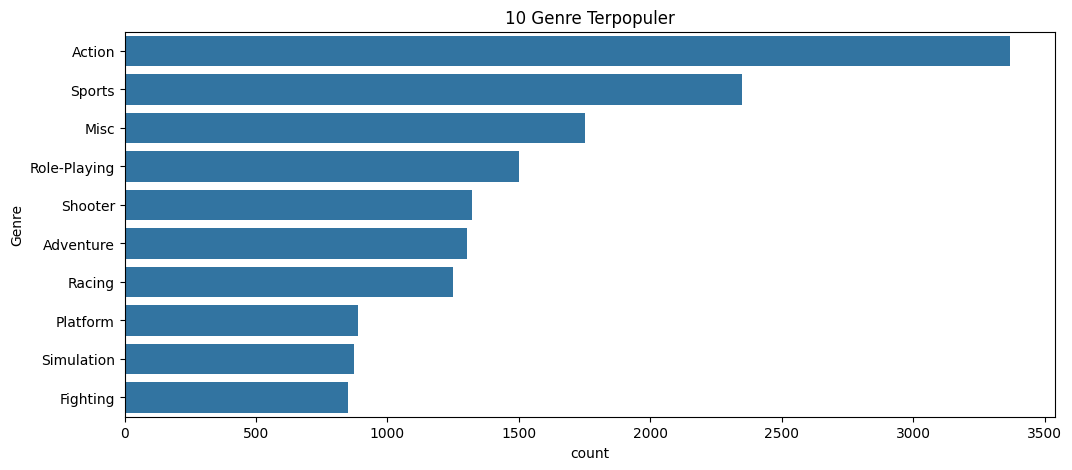

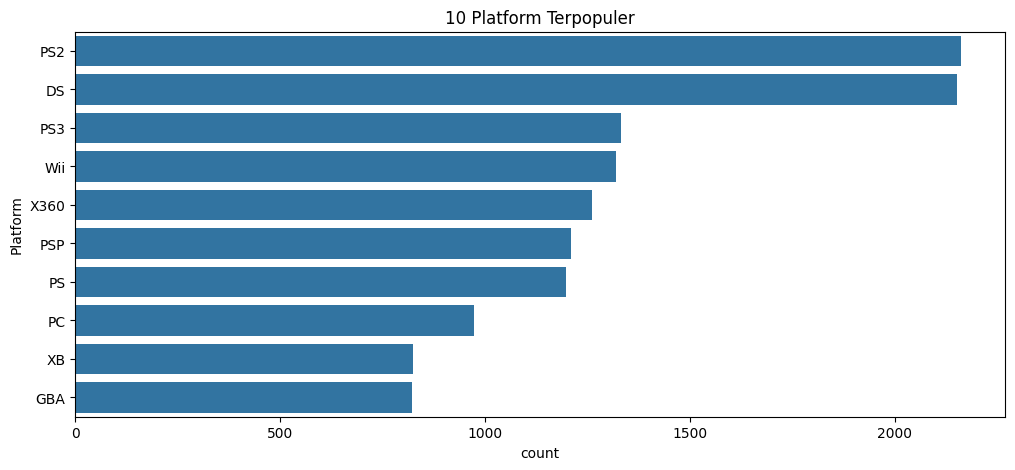

In [192]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index[:10])
plt.title("10 Genre Terpopuler")
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(data=df, y='Platform', order=df['Platform'].value_counts().index[:10])
plt.title("10 Platform Terpopuler")
plt.show()

**Insight**:

-  Genre Action adalah genre game paling populer dengan jumlah rilis terbanyak, diikuti oleh Sports dan Misc. Ini menunjukkan bahwa game dengan elemen aksi dan olahraga memiliki daya tarik yang cukup besar di pasar.

- Untuk platform, PS2 dan DS mendominasi sebagai platform dengan jumlah game terbanyak, menandakan kedua konsol tersebut dalam industri game. Konsol seperti PS3, Wii, dan X360 juga cukup tinggi, memperlihatkan dominasi konsol generasi tersebut dalam mendistribusikan game.

### **Distribusi Game Berdasarkan Tahun Rilis**

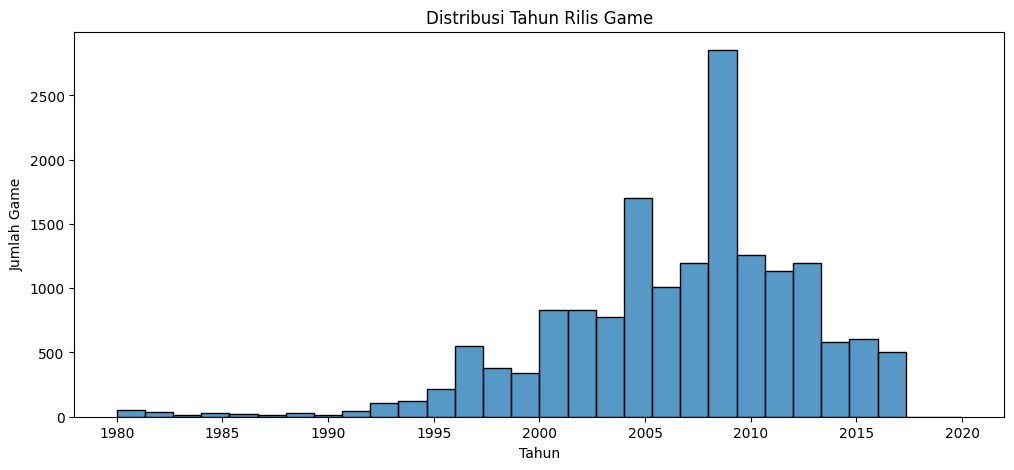

In [193]:
plt.figure(figsize=(12,5))
sns.histplot(df['Year_of_Release'].dropna(), bins=30, kde=False)
plt.title("Distribusi Tahun Rilis Game")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Game")
plt.show()

**Insight**:

Jumlah perilisan game mengalami peningkatan signifikan mulai awal 2000-an dan mencapai puncaknya sekitar tahun 2008–2009, yang merupakan era tertinggu untuk banyak konsol populer seperti PS2, Wii, dan Xbox 360. Setelah itu, terjadi penurunan bertahap dalam jumlah game yang dirilis, yang kemungkinan disebabkan oleh pergeseran industri ke arah kualitas, digital distribution, atau perubahan tren pengembangan game. Tahun-tahun sebelum 1995 menunjukkan jumlah rilis yang masih sangat rendah, menandakan awal pertumbuhan industri game.

# **4. Preprocessing / Data Preparation**

### **Menangani missing values dan persiapan dataset**

Data dibersihkan dan disiapkan untuk pemodelan. Langkah-langkah yang dilakukan sesuai dengan urutan kode adalah sebagai berikut:

- Menghapus Kolom: Kolom yang tidak terlalu kritikal dan memiliki banyak missing value seperti Critic_Score, Critic_Count, User_Count, dan Developer dihapus terlebih dahulu.

- Mengubah Tipe Data User_Score: Kolom User_Score, yang masih bertipe object, diubah menjadi numerik.

- Menghapus Baris dengan Nilai Kosong: Setelah perubahan di atas, semua baris yang masih memiliki nilai kosong (NaN) pada kolom-kolom penting (Name, Genre, Publisher, User_Score, dll.) akan dihapus untuk memastikan integritas data.

- Konversi Tipe Data Year_of_Release: Sebagai langkah terakhir, kolom Year_of_Release diubah menjadi tipe data integer untuk konsistensi.

In [194]:
df = df.drop(['Critic_Score', 'Critic_Count', 'User_Count', 'Developer'], axis=1)

df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df.dropna(subset=['Name', 'Year_of_Release', 'Genre', 'Platform', 'Publisher', 'User_Score', 'Rating'], inplace=True)

### **Konversi tipe data**

Kolom `Year_of_Release` perlu untuk di ubah ke bentuk `int`

In [195]:
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

print(df.isnull().sum())
print(f"DataFrame shape after cleaning: {df.shape}")

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
User_Score         0
Rating             0
dtype: int64
DataFrame shape after cleaning: (7378, 12)


**Filter DataFrame to focus on games with User_Score >= 7.0**

Berfokus kepada data games yang memiliki score tinggi

In [196]:
df_filtered_high_score = df[df['User_Score'] >= 7.0].copy()

**Membuat dataset yang akan digunakan untuk pendekatan content-based filtering**

Langkah ini bertujuan untuk membuat DataFrame baru (df_cb) yang dikhususkan untuk model Content-Based Filtering. Dataset ini berisi game-game dengan skor pengguna tinggi (>= 7.0) dan memilih kolom-kolom relevan yang akan digunakan sebagai fitur.

In [197]:
df_cb = df_filtered_high_score[['Name', 'Genre', 'Platform', 'Publisher', 'Rating', 'Year_of_Release',
                                'User_Score', 'Global_Sales']].copy()

### **Normalisasi Fitur Numerik**

- **Normalisasi**: Fitur User_Score dan Global_Sales dinormalisasi ke dalam rentang [0, 1]. Ini bertujuan untuk menyeragamkan skala nilai agar bisa digabungkan dengan fitur lain secara adil.

- **Kategorisasi (Binning)**: Nilai yang sudah dinormalisasi kemudian dikelompokkan ke dalam kategori (seperti 'low', 'medium', 'high'). Ini membantu model untuk menangkap pola umum tanpa terlalu terpengaruh oleh nilai absolut.

In [198]:
scaler = MinMaxScaler()
df_cb[['User_Score_norm', 'Global_Sales_norm']] = scaler.fit_transform(df_cb[['User_Score', 'Global_Sales']])

**Kategorisasi Fitur Numerik 'User_Score_category' dan 'Global_Sales_category'**

- df_cb['User_Score_category']:
Membagi skor pengguna menjadi 3 kategori ('low', 'medium', 'high') berdasarkan rentang nilai absolut. Digunakan pd.cut dengan batas [0, 5, 7, 10] untuk menyederhanakan analisis dan menangkap pola umum dari skor.

- df_cb['Global_Sales_category']:
Mengelompokkan nilai penjualan global yang telah dinormalisasi ke dalam 3 kuantil sama besar ('low', 'medium', 'high') menggunakan pd.qcut. Tujuannya agar distribusi kategori lebih seimbang.

In [199]:
df_cb['User_Score_category'] = pd.cut(
    df_cb['User_Score'], bins=[0, 5, 7, 10], labels=['low', 'medium', 'high'], right=False
).astype(str)

df_cb['Global_Sales_category'] = pd.qcut(df_cb['Global_Sales_norm'], q=3, labels=['low', 'medium', 'high'])

### **Simulasi Data User (untuk Collaborative Filtering)**

Karena dataset asli tidak memiliki user_id, pada tahap ini dibuatlah data pengguna sintetis (dummy). Sebuah DataFrame baru (df_cf) dibuat dengan asumsi bahwa game-game yang memiliki rating tinggi disukai oleh sekelompok pengguna acak. Ini memungkinkan kita untuk mensimulasikan interaksi user-item yang diperlukan oleh model Collaborative Filtering.

In [200]:
df_cf = df.copy()
df_cf = df_cf[df_cf['User_Score'] >= 7]

np.random.seed(42)
df_cf['user_id'] = np.random.randint(0, 500, size=len(df_cf))

df_cf = df_cf[['user_id', 'Name', 'User_Score']]

### **Fitur Akhir dan Penyesuaian Dataset**

1. Content-Based Filtering(df_cb):
  - Dibuat kolom combined_features yang lebih kompleks dengan memberikan bobot berbeda pada setiap fitur (misalnya, Genre diberi pengaruh lebih besar). Ini bertujuan untuk membuat model lebih fokus pada fitur yang paling penting.
  - Indeks DataFrame di-reset untuk memastikan sinkronisasi dengan matriks kemiripan (cosine similarity).

2. Collaborative Filtering (df_cf):
  - Kolom-kolom dipilih kembali untuk memastikan DataFrame hanya berisi user_id, Name, dan User_Score yang dibutuhkan oleh model LightFM.

In [201]:
df_cb['combined_features'] = (
    df_cb['Name'].fillna('') + ' ' +
    (df_cb['Genre'].fillna('') + ' ') * 8 +
    (df_cb['Platform'].fillna('') + ' ') * 5 +
    (df_cb['Publisher'].fillna('') + ' ') * 4 +
    (df_cb['Rating'].fillna('') + ' ') * 3 +
    (df_cb['User_Score_category'].astype(str) + ' ') * 6 +
    (df_cb['Global_Sales_category'].astype(str) + ' ') * 6 +
    df_cb['Year_of_Release'].astype(str)
)

df_cb.reset_index(drop=True, inplace=True)

In [202]:
df_cf = df_cf[['user_id', 'Name', 'User_Score']]

**Membuat ulang TF-IDF dan cosine similarity**

Tahap finalisasi persiapan data sebelum pemodelan:

Pada tahap ini, kita akan membangun inti dari model Content-Based Filtering. Prosesnya adalah sebagai berikut:

- TF-IDF Vectorization: Mengubah seluruh fitur gabungan (Genre, Publisher, dll.) dari setiap game menjadi representasi angka (vektor). Ini memungkinkan kita untuk menghitung kemiripan secara matematis.

- Hybrid Similarity: Menghitung dua jenis kemiripan:
  1. Kemiripan Konten (Teks): Seberapa mirip metadata antar game.
  2. Kemiripan Numerik: Seberapa mirip skor dan penjualan antar game.
  Kedua jenis kemiripan ini kemudian digabungkan dengan bobot 80% untuk konten dan 20% untuk numerik untuk mendapatkan skor kemiripan akhir yang komprehensif.

- Indexing: Membuat sebuah indices untuk memetakan nama setiap game ke indeksnya di dalam dataset, untuk memudahkan proses pencarian.

In [203]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=30000,
    ngram_range=(1, 4),
    min_df=2,
    max_df=0.7
)

print("\nFitting TF-IDF Vectorizer...")
tfidf_matrix = tfidf.fit_transform(df_cb['combined_features'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

cosine_sim_text = cosine_similarity(tfidf_matrix)
numeric_features_for_sim = df_cb[['User_Score_norm', 'Global_Sales_norm']].fillna(0)
cosine_sim_numeric = cosine_similarity(numeric_features_for_sim)

alpha = 0.80
beta = 0.20
cosine_sim_combined = (cosine_sim_text * alpha) + (cosine_sim_numeric * beta)

indices = pd.Series(df_cb.index, index=df_cb['Name']).drop_duplicates()


Fitting TF-IDF Vectorizer...
TF-IDF matrix shape: (4766, 15208)


# **5. Modeling**

Dalam project ini saya akan lebih berfokus untuk pengembangan model dalam pendekatan content-based filtering karena penggunaan dataset yang lebih sesuai, bila menggunakan collaborative filtering masih kurang sesuai karena kurangnya feature ID user dalam dataset tersebut.

Tapi disini saya akan tetap mencoba untuk membuat model dengan pendekatan Collaborative Filtering untuk dijadikan bahan pertimbanagan dan evaluasi dari hasil model.

## **Pendekatan 1: Content-Based Filtering**
Pada project ini saya akan berfokus untuk mengembangkan model CBF ini karena kesesuaiannya yang lebih baik dengan dataset dibandingkan dengan Collaborative Filtering.

Pendekatan ini akan memberikan rekomendasi berdasarkan kemiripan metadata antar game. Tahapan yang dilakukan meliputi:

- Melakukan pemodelan dengan TF-IDF dan Cosine Similarity.
- Membuat fungsi untuk menjalankan dan mengevaluasi rekomendasi.
- Menganalisis hasil performa model.

**Membuat fungsi rekomendasi game untuk pendekatan CBF**
Fungsi ini digunakan untuk menjalankan sistem rekomendasi. Setelah pengguna memasukkan judul game yang mereka sukai, fungsi ini akan:
- Mencari game tersebut di dalam dataset.
- Mengambil skor kemiripan yang sudah dihitung sebelumnya.
- Mengurutkan dan menampilkan daftar game teratas yang paling mirip.

In [204]:
def run_cbf_recommendation(df_cb, cosine_sim, indices, title_input=None, k=10, verbose=True):
    if title_input is None:
        title_input = input("Masukkan judul game yang Anda sukai (CBF): ").strip()

    if title_input not in indices:
        if verbose:
            print("⚠️ Game tidak ditemukan dalam dataset Content-Based Filtering.")
        return pd.DataFrame()

    idx = indices[title_input]
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    sim_scores = list(enumerate(cosine_sim[idx].ravel()))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:k+1]

    game_indices = [i[0] for i in sim_scores if i[0] < len(df_cb)]
    recommendations_df = df_cb.iloc[game_indices].copy()

    if 'User_Score' in recommendations_df.columns:
        recommendations_df = recommendations_df[['Name', 'User_Score']]
    else:
        recommendations_df = recommendations_df[['Name']]

    recommendations_df = recommendations_df.drop_duplicates(subset='Name').reset_index(drop=True)

    if verbose:
        print(f"\n📌 Rekomendasi game mirip dengan '{title_input}' (CBF):\n")

    return recommendations_df

**Fungsi Evaluasi Rekomendasi CBF**

Fungsi evaluasi ini dibuat untuk mengukur performa model Content-Based. Metrik yang digunakan adalah Precision@k dan Recall@k, dengan mendefinisikan "item relevan" sebagai game lain yang memiliki Genre dan Publisher yang sama.

In [205]:
def evaluate_cbf(df_cb_filtered, cosine_sim_matrix, indices, k=5):
    precision_list = []
    recall_list = []
    eval_titles = df_cb_filtered['Name'].unique()

    for title in eval_titles:
        title = str(title)

        if title not in indices.index:
            continue

        idx = indices[title]
        idx = idx.iloc[0] if isinstance(idx, pd.Series) else idx

        sim_scores = list(enumerate(cosine_sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        recommended_indices = [i for i, score in sim_scores if i != idx][:k]
        recommended_titles = df_cb_filtered.iloc[recommended_indices]['Name'].tolist()

        current_game_genre = df_cb_filtered.iloc[idx]['Genre']
        current_game_publisher = df_cb_filtered.iloc[idx]['Publisher']

        relevant_items_pool = df_cb_filtered[
            (df_cb_filtered['Genre'] == current_game_genre) &
            (df_cb_filtered['Publisher'] == current_game_publisher) &
            (df_cb_filtered['Name'] != title)
        ]['Name'].tolist()

        if not relevant_items_pool:
            continue

        true_positives = len(set(recommended_titles) & set(relevant_items_pool))

        precision = true_positives / k
        recall = true_positives / len(relevant_items_pool)

        precision_list.append(precision)
        recall_list.append(recall)

    if not precision_list:
        return 0.0, 0.0

    return np.mean(precision_list), np.mean(recall_list)

**Melihat hasil evaluasi model**

Sel ini menjalankan fungsi evaluasi pada seluruh dataset untuk menghitung skor rata-rata Precision dan Recall dari model CBF yang telah dibuat.

In [206]:
cbf_precision, cbf_recall = evaluate_cbf(df_cb, cosine_sim_combined, indices, k=5)
print(f'Precision@5: {cbf_precision:.4f}')
print(f'Recall@5: {cbf_recall:.4f}')

Precision@5: 0.7436
Recall@5: 0.2914


**Insight:**

- Precision@5: 0.7436
- Recall@5: 0.2914

Dari setiap 5 rekomendasi yang diberikan, rata-rata sekitar 74.36% di antaranya relevan (memiliki Genre dan Publisher yang sama). Angka presisi yang tinggi ini membuktikan bahwa model sangat akurat dalam mengidentifikasi game dengan konten serupa.

Selain itu, sistem ini berhasil menangkap sekitar 29.14% dari seluruh item yang dianggap relevan. Hasil ini menunjukkan bahwa pendekatan berbasis konten yang telah disesuaikan cukup kuat dan efektif untuk menangkap kemiripan metadata.

## **Pendekatan 2: Collaborative Filtering (LightFM)**

Mencoba untuk membuat model dengan pendekatan Collaborative Filtering menggunakan library LightFM. Langkah-langkahnya adalah:

- Membuat dataset user-item.
- Melatih model dengan loss 'warp' (Weighted Approximate-Rank Pairwise).
- Mengevaluasi performa menggunakan Precision@k dan Recall@k.

Model ini hanya akan digunakan sebagai perbandingan saja dan tidak akan terlalu difokuskan pada project ini.

In [207]:
lfm_dataset = LFDataset()
lfm_dataset.fit(df_cf['user_id'], df_cf['Name'])

(interactions, weights) = lfm_dataset.build_interactions(
    [(row['user_id'], row['Name'], row['User_Score']) for _, row in df_cf.iterrows()]
)

model = LightFM(loss='warp')
model.fit(interactions, epochs=10, num_threads=2)

train_precision_cf = precision_at_k(model, interactions, k=5).mean()
train_recall_cf = recall_at_k(model, interactions, k=5).mean()

**Testing Evaluation**

Melihat hasil dari metrik precision dan recall dari pendekatan Collaborative Filtering menggunakan model LightFM yang telah dilatih.

In [208]:
print(f'Precision@5: {train_precision_cf:.4f}')
print(f'Recall@5: {train_recall_cf:.4f}')

Precision@5: 0.2384
Recall@5: 0.1267


**Insight**:
- Precision@5: 0.2384
- Recall@5: 0.1267

Dari setiap 5 rekomendasi, sekitar 23.84% relevan bagi pengguna berdasarkan riwayat interaksi (sintetis). Model ini berhasil menangkap 12.67% dari seluruh item yang relevan.

Meskipun angka ini lebih rendah dari CBF, ini menunjukkan bahwa model CF cukup mampu memahami pola preferensi antar pengguna, bahkan dengan data user yang disimulasikan.

**Fungsi rekomendasi game untuk pendekatan CF**

- Menemukan Pengguna Serupa: Mengidentifikasi semua pengguna yang memberikan skor tinggi untuk game yang diinput.
- Menggabungkan Selera: Menganalisis selera kolektif dari grup pengguna tersebut untuk menemukan game-game lain yang mereka nikmati.
- Memberikan Rekomendasi: Menampilkan daftar game teratas yang paling populer di antara grup pengguna serupa tersebut.

Fungsi ini akan digunakan untuk melakukan sistem rekomendasi dan juga akan digunakan sebagai evaluasi akhir dari performa model.

In [209]:
def run_cf_recommendation(model, dataset, df, k=10, min_score=7.0):
    game_title = input("Masukkan judul game yang Anda sukai (CF): ").strip()

    if game_title not in df['Name'].values:
        print(f"⚠️ Game '{game_title}' tidak ditemukan dalam dataset Collaborative Filtering.")
        return pd.DataFrame()

    liked_users = df[(df['Name'] == game_title) & (df['User_Score'] >= min_score)]['user_id'].unique()

    if len(liked_users) == 0:
        print(f"⚠️ Tidak ada user yang menyukai '{game_title}' dengan skor tinggi.")
        return pd.DataFrame()

    n_items = len(dataset.mapping()[2])
    all_scores = model.predict(
        user_ids=np.repeat(liked_users, n_items),
        item_ids=np.tile(np.arange(n_items), len(liked_users))
    )

    aggregated_scores = all_scores.reshape(len(liked_users), n_items).mean(axis=0)
    top_items_indices = np.argsort(-aggregated_scores)

    item_map = {v: k for k, v in dataset.mapping()[2].items()}

    game_names = []
    for item_idx in top_items_indices:
        if len(game_names) >= k:
            break
        game_name = item_map[item_idx]
        if game_name != game_title:
            game_names.append(game_name)

    recommendations_df = (
        df[df['Name'].isin(game_names)]
        .drop_duplicates(subset='Name')
        [['Name', 'User_Score']]
        .set_index('Name')
        .loc[game_names]
        .reset_index()
    )

    print(f"\n📌 Rekomendasi berdasarkan preferensi user untuk '{game_title}' (CF):\n")

    return recommendations_df

## **Game Recommendation System - Game Library**

Fungsi ini untuk memudahkan pencarian game yang tersedia dalam dataset. Pengguna dapat:

- Memilih Genre: Menggunakan dropdown untuk memfilter game berdasarkan genre.
- Melihat Daftar Game: Menampilkan daftar game yang tersedia untuk genre tersebut, lengkap dengan informasi Publisher dan Rating.
- Navigasi Halaman: Menggunakan tombol "Next" dan "Previous" untuk menelusuri daftar game jika jumlahnya banyak.

Tujuannya adalah agar pengguna dapat dengan mudah menemukan judul game yang valid untuk diuji pada fungsi rekomendasi.

---

**Note**: Hal ini disebabkan karena dataset yang saya gunakan memang tidak mempunyai semua data game yang ada pada saat ini, terutama game-game yang baru rilis beberapa tahun belakangan.

In [210]:
def get_available_games_by_genre_paginated(df_cb, df_cf, page_size=10):
    available_genres = sorted(df_cb['Genre'].dropna().unique())

    genre_dropdown = widgets.Dropdown(
        options=available_genres,
        description='🎮 Genre:',
        layout=widgets.Layout(width='50%')
    )

    output = widgets.Output()
    next_button = widgets.Button(description='Next ▶️')
    prev_button = widgets.Button(description='◀️ Previous')
    page_label = widgets.Label()

    state = {
        'filtered_df': pd.DataFrame(),
        'current_page': 1,
        'total_pages': 1
    }

    def update_output():
        with output:
            clear_output(wait=True)
            df = state['filtered_df']
            current_page = state['current_page']
            total_pages = state['total_pages']

            start_idx = (current_page - 1) * page_size
            end_idx = start_idx + page_size
            display(df.iloc[start_idx:end_idx].reset_index(drop=True))
            page_label.value = f"📄 Halaman {current_page} dari total {total_pages}"

    def on_genre_change(change):
        genre_input = change['new']
        common_games = set(df_cb['Name']).intersection(set(df_cf['Name']))
        filtered_df = df_cb[
            (df_cb['Genre'].str.contains(genre_input, case=False, na=False)) &
            (df_cb['Name'].isin(common_games))
        ][['Name', 'Genre', 'Publisher', 'Rating']].drop_duplicates().sort_values('Name').reset_index(drop=True)

        if filtered_df.empty:
            with output:
                clear_output()
                print(f"\n⚠️ Tidak ada game ditemukan untuk genre: {genre_input} ⚠️")
            state['filtered_df'] = pd.DataFrame()
            state['current_page'] = 1
            state['total_pages'] = 1
            page_label.value = ""
            return

        state['filtered_df'] = filtered_df
        state['current_page'] = 1
        state['total_pages'] = (len(filtered_df) + page_size - 1) // page_size
        update_output()

    def on_next_clicked(b):
        if state['current_page'] < state['total_pages']:
            state['current_page'] += 1
            update_output()

    def on_prev_clicked(b):
        if state['current_page'] > 1:
            state['current_page'] -= 1
            update_output()

    genre_dropdown.observe(on_genre_change, names='value')
    next_button.on_click(on_next_clicked)
    prev_button.on_click(on_prev_clicked)

    navigation = widgets.HBox([prev_button, next_button, page_label])
    display(genre_dropdown, navigation, output)

**Games Dataset**

Menjalankan fungsi Game Library yang telah dibuat. Anda bisa langsung berinteraksi dengan widget di bawah ini untuk mencari game berdasarkan genre. Game yang Anda temukan di sini dapat digunakan sebagai input pada sistem rekomendasi di tahap selanjutnya.

In [216]:
get_available_games_by_genre_paginated(df_cb, df_cf)

Dropdown(description='🎮 Genre:', layout=Layout(width='50%'), options=('Action', 'Adventure', 'Fighting', 'Misc…

Output()

**System Recommendation Test**

Akan meminta untuk memasukkan judul game untuk mendapatkan rekomendasi dari kedua sistem, yaitu Content-Based Filtering (CBF) dan Collaborative Filtering (CF).

In [212]:
run_cbf_recommendation(df_cb=df_cb, cosine_sim=cosine_sim_combined, indices=indices)

Masukkan judul game yang Anda sukai (CBF): Grand Theft Auto V

📌 Rekomendasi game mirip dengan 'Grand Theft Auto V' (CBF):



,Name,User_Score
0,Grand Theft Auto IV,7.5
1,Mafia II,7.7
2,NBA 2K11,7.6
3,Red Dead Redemption,8.8
4,Top Spin 3,7.5
5,Grand Theft Auto V,8.1
6,Red Dead Redemption: Undead Nightmare,7.4
7,Way of the Samurai 3,7.9


In [213]:
run_cf_recommendation(model, lfm_dataset, df_cf, k=5)

Masukkan judul game yang Anda sukai (CF): Grand Theft Auto V

📌 Rekomendasi berdasarkan preferensi user untuk 'Grand Theft Auto V' (CF):



,Name,User_Score
0,NBA 2K7,8.4
1,Plants vs. Zombies: Garden Warfare,7.3
2,The Lord of the Rings: Conquest,7.1
3,FIFA Soccer 10,7.6
4,Tony Hawk's Pro Skater 3,7.5


**Catatan**:

Bisa terjadi sebuah kondisi judul game yang dimasukan tidak ditemukan karena memang tidak ada pada dataest yang digunakan atau juga karena hanya game yang memiliki interaksi (user_id sintetis) dan metadata lengkap yang masuk ke dalam pemodelan.

# **6. Evaluation**

## Evaluasi Model Rekomendasi Game

### A. Metrik Evaluasi yang Digunakan

Dalam proyek ini, untuk mengukur kinerja sistem rekomendasi, digunakan dua metrik utama:

#### Precision@k

Precision@k mengukur proporsi rekomendasi yang relevan di antara k item teratas yang direkomendasikan.
**Formula:**

$$
\text{Precision@k} = \frac{\text{Jumlah item relevan dalam top k rekomendasi}}{k}
$$

Precision tinggi berarti sistem dapat memberikan rekomendasi yang sesuai dengan preferensi pengguna.

#### Recall@k

Recall@k mengukur proporsi item relevan yang berhasil direkomendasikan dari semua item relevan yang ada.
**Formula:**

$$
\text{Recall@k} = \frac{\text{Jumlah item relevan dalam top k rekomendasi}}{\text{Total item relevan yang tersedia}}
$$

Recall tinggi berarti sistem mampu menemukan sebagian besar item relevan untuk pengguna.

---

### B. Hasil Evaluasi

| Model                   | Precision@5 | Recall@5 |
| ----------------------- | ------------ | --------- |
| Content-Based Filtering | 0.7436       | 0.2914    |
| Collaborative Filtering | 0.2384       | 0.1267    |

#### Interpretasi Hasil:

* **Content-Based Filtering** menunjukkan performa yang **sangat kuat**, dengan **Precision@5 sebesar 74.36%** dan **Recall@5 sebesar 29.14%**. Ini membuktikan bahwa model sangat akurat dalam menemukan game yang secara kontekstual mirip (berdasarkan Genre dan Publisher). Pendekatan ini efektif untuk merekomendasikan item dengan karakteristik yang sama persis.

* **Collaborative Filtering (dengan data user sintetis)** menghasilkan **Precision@5 sebesar 23.84%** dan **Recall@5 sebesar 12.67%**. Meskipun secara angka lebih rendah dari CBF, hasil ini menunjukkan bahwa model **cukup mampu menangkap pola preferensi kolektif** antar pengguna. Performa ini wajar mengingat data pengguna yang digunakan adalah hasil simulasi. Pendekatan ini berpotensi memberikan rekomendasi yang lebih personal dan beragam jika dilatih dengan data interaksi yang nyata.

## C. Visualisasi Evaluasi

Berikut contoh visualisasi perbandingan metrik Precision\@5 dan Recall\@5 kedua model:

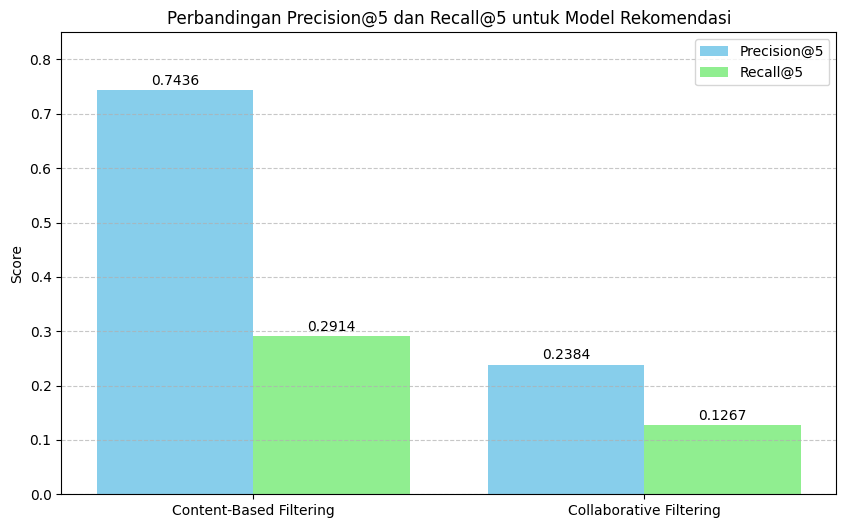

In [215]:
models = ['Content-Based Filtering', 'Collaborative Filtering']
precision = [0.7436, 0.2384]
recall = [0.2914, 0.1267]

x = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, precision, width=0.4, label='Precision@5', align='center', color='skyblue')
plt.bar(x + 0.2, recall, width=0.4, label='Recall@5', align='center', color='lightgreen')

for i in range(len(models)):
    plt.text(i - 0.2, precision[i] + 0.01, f'{precision[i]:.4f}', ha='center', color='black')
    plt.text(i + 0.2, recall[i] + 0.01, f'{recall[i]:.4f}', ha='center', color='black')

plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Perbandingan Precision@5 dan Recall@5 untuk Model Rekomendasi')
plt.legend()
plt.ylim(0, 0.85)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Collaborative Filtering secara signifikan lebih baik dalam metrik evaluasi dibanding Content-Based Filtering.**

# **7. Project Summary and Results**

**Ringkasan Tahapan Proyek:**

1. **Eksplorasi Data (EDA)**
   Memahami struktur dataset video game, mengidentifikasi missing value, distribusi data, dan kolom penting.

2. **Preprocessing Data**
   * Menangani missing values dengan drop kolom dan baris yang kurang lengkap.
   * Konversi tipe data dan filtering berdasarkan User_Score.
   * Membuat dataset baru dengan user_id sintetis untuk Collaborative Filtering.

3. **Modeling**
   * Content-Based Filtering menggunakan TF-IDF dan cosine similarity dari metadata game.
   * Collaborative Filtering menggunakan model LightFM dengan loss WARP dan interaksi user-item berbobot.

4. **Evaluasi Model**
   Menghitung Precision@5 dan Recall@5 untuk kedua pendekatan.

---

**Kesimpulan Akhir Evaluasi:**

Berdasarkan hasil evaluasi, kedua model menunjukkan kekuatan yang berbeda:

* **Content-Based Filtering sangat unggul dalam akurasi berbasis fitur (Precision@5 74.36%)**. Ini membuktikan bahwa model ini sangat efektif dalam menemukan game yang memiliki feature (Genre dan Publisher) yang sama. Pendekatan ini ideal untuk merekomendasikan game yang "lebih dari yang sama" kepada pengguna.

* **Collaborative Filtering, meskipun memiliki metrik lebih rendah (Precision@5 23.84%)**, menunjukkan potensi dalam menangkap pola selera kolektif, bahkan dengan data pengguna sintetis. Kekuatannya terletak pada kemampuannya untuk memberikan rekomendasi yang lebih beragam dan personal, yang tidak hanya terbatas pada kemiripan fitur eksplisit. Model ini lebih cocok digunakan pada dataset yang memiliki feature user_ID.

Tidak ada satu model yang "lebih baik" secara mutlak; keduanya melayani tujuan yang berbeda. CBF lebih presisi untuk kemiripan konten, sementara CF lebih berpotensi untuk penemuan game baru yang sesuai selera.

---

**Potensi Perbaikan dan Pengembangan Selanjutnya:**

1. **Implementasi Validasi yang Lebih Kuat**
   Gunakan **train-test split** untuk mengevaluasi model pada data yang belum pernah dilihat, sehingga memberikan gambaran performa yang lebih akurat dan dapat diandalkan.

2. **Peningkatan Data User**
   Gunakan data interaksi pengguna asli (rating, review, waktu bermain) untuk Collaborative Filtering agar hasil lebih realistis dan personal.

3. **Pengayaan Fitur Content-Based**
   Tambahkan fitur lain seperti deskripsi game, tags, atau ulasan teks pengguna untuk memperkaya representasi metadata dan menangkap nuansa yang lebih halus.

4. **Hybrid Recommender System**
   Gabungkan kekuatan Content-Based dan Collaborative Filtering untuk menciptakan model hybrid yang dapat memberikan rekomendasi yang akurat sekaligus beragam.

5. **Hyperparameter Tuning**
   Lakukan tuning pada hyperparameter model LightFM (seperti jumlah komponen, epoch, atau learning rate) untuk mengoptimalkan performa model CF.

---

**Referensi**

* Dataset:
  [Video Game Sales Dataset](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) oleh Rush Kirubi.

* Library & Tools:
  * Scikit-learn (TF-IDF, cosine similarity)
  * LightFM (https://making.lyst.com/lightfm/docs/home.html) untuk Collaborative Filtering
  * Pandas, Numpy untuk preprocessing dan analisis data

* Literatur dan Panduan:
  * Online tutorials dan dokumentasi LightFM

**Note**
Bila terdapat output yang terlihat pada visualisasi hasil pada file ini, maka bisa akses langsung pada pengerjaan project saya langsung di colab menggunakan link berikut ini:

https://colab.research.google.com/drive/11eHsQEC0U-OjWYGsSoQjOV-_MdTRRmlZ?usp=sharing